In [1]:
#import dependencies
import sys
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print ('Python  : ', format(sys.version))
print ('numpy  : ', format(np.__version__))
print ('pandas  : ', format(pd.__version__))
print ('scipy  : ', format(scipy.__version__))
print ('sklearn  : ', format(sklearn.__version__))
#print ('matplotlib  : ', format(matplotlib.__version__))
print ('seaborn  : ', format(sns.__version__))

Python  :  3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
numpy  :  1.14.0
pandas  :  0.22.0
scipy  :  1.0.0
sklearn  :  0.19.1
seaborn  :  0.8.1


In [2]:
#loading the dataset

data = pd.read_csv('data\creditcard.csv')

In [3]:
 #exporing dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
print (data.shape)

(284807, 31)


In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
#taking fraction of data almost 10%

#data = data.sample(frac = 0.1, random_state = 1)

#print(data.shape)

In [7]:
#Dropping NA values from dataset
data = data.dropna(axis = 0)

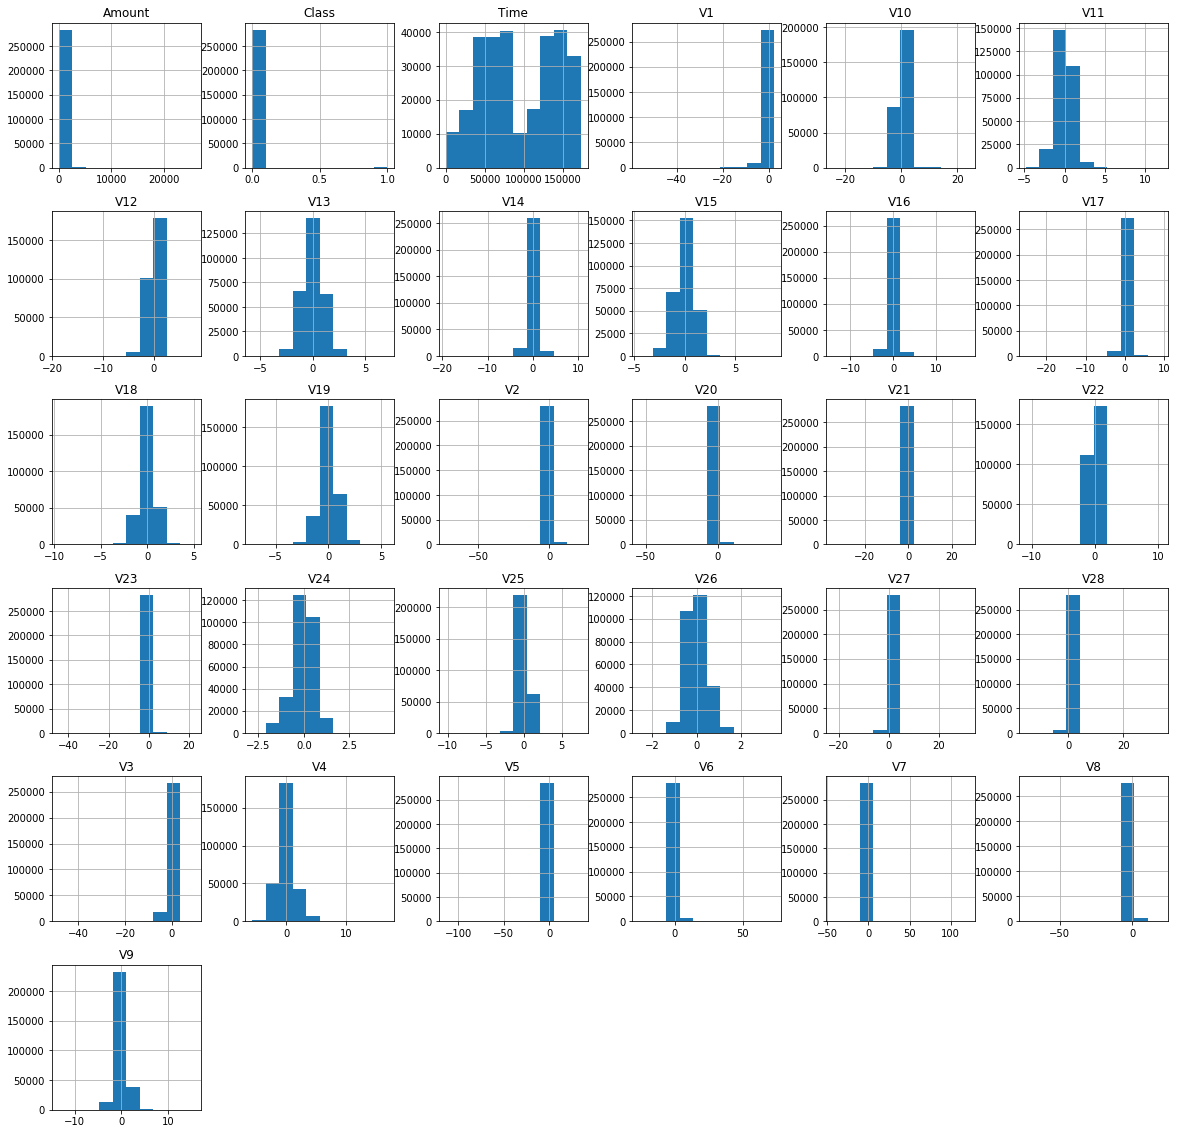

In [8]:
#plot histogram of each variable
data.hist(figsize = (20,20))
plt.show()

In [9]:
#seeing through the number of fraud cases present in our dataset
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

#
outlier_fraction = len(fraud) / float(len(valid))
print('fraction : {}'.format(outlier_fraction))

#printng fraud cases
print('Fraud : {} '.format(len(fraud)))

#printing valid cases
print('Valid : {}'.format(len(valid)))

fraction : 0.0017304750013189597
Fraud : 492 
Valid : 284315


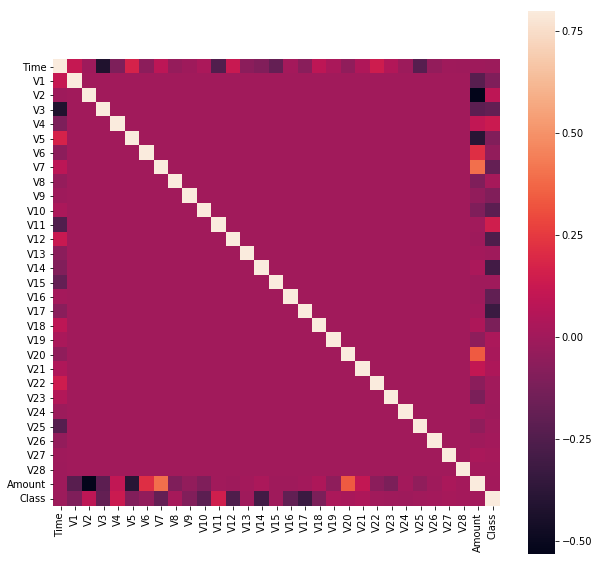

In [10]:
#corelation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (10,10))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
#get all the columns from the dataframe
columns = data.columns.tolist()

#removing the target data
columns = [c for c in columns if c not in ['Class']]

#target variable
target = 'Class'

X = data[columns]
Y = data[target]

#print the shape of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [13]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 645
0.997735308472053
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.34      0.35      0.35       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807

